In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore



In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
print("The shape of the data set is :",df.shape)

The shape of the data set is : (1599, 12)


In [8]:
df=df.drop_duplicates()

In [9]:
print("rows and columns after droping duplicates:",df.shape)

rows and columns after droping duplicates: (1359, 12)


In [10]:
df["fixed acidity"].value_counts()

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
df.nunique().to_frame("unique value")

,unique value
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

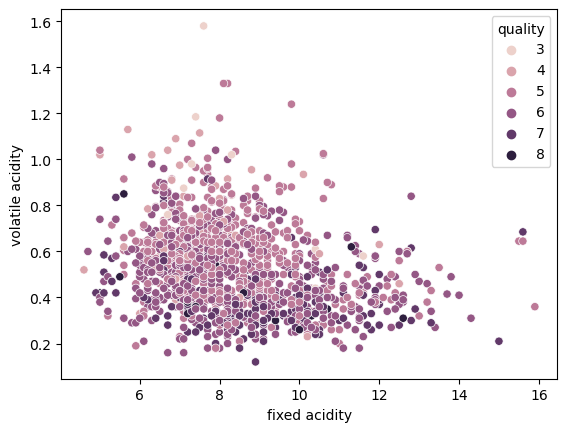

In [15]:
sns.scatterplot(data=df,x='fixed acidity',y='volatile acidity',hue='quality')

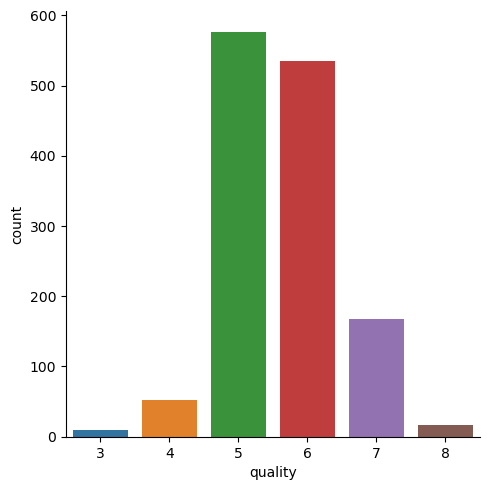

In [16]:
sns.catplot(x='quality',data=df,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

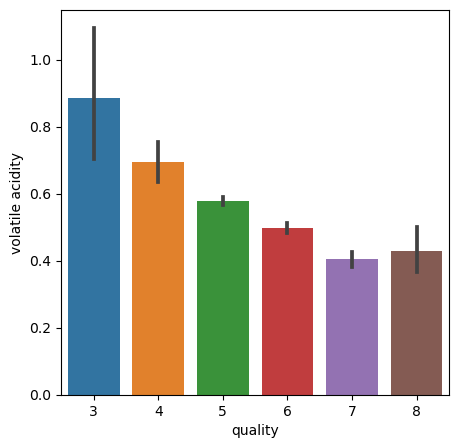

In [17]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)

<Axes: xlabel='quality', ylabel='fixed acidity'>

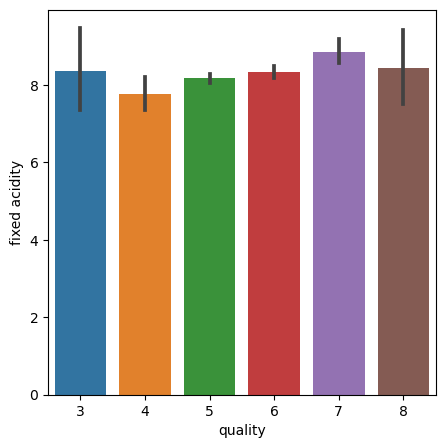

In [18]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='fixed acidity',data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

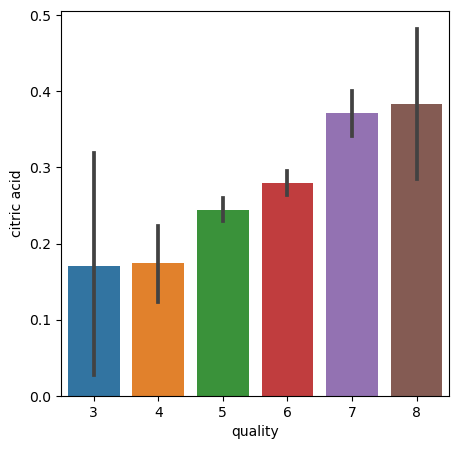

In [19]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

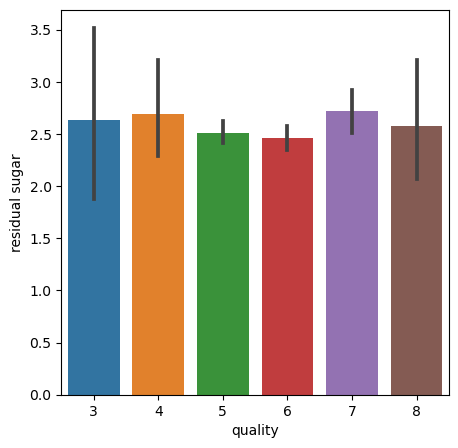

In [20]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

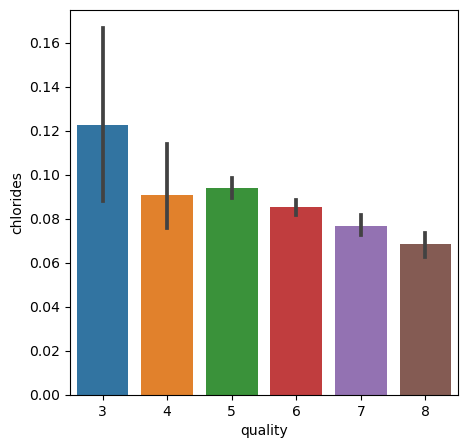

In [21]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

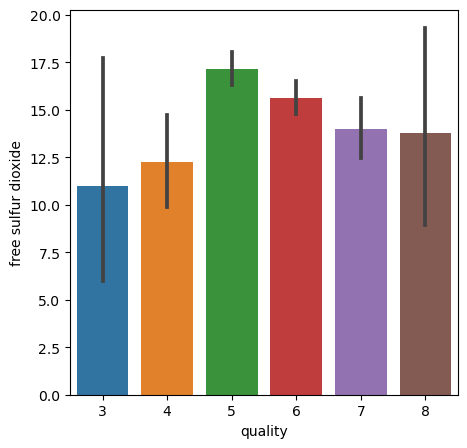

In [22]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

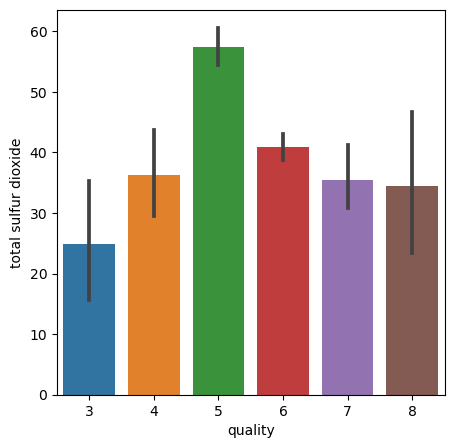

In [23]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

<Axes: xlabel='quality', ylabel='density'>

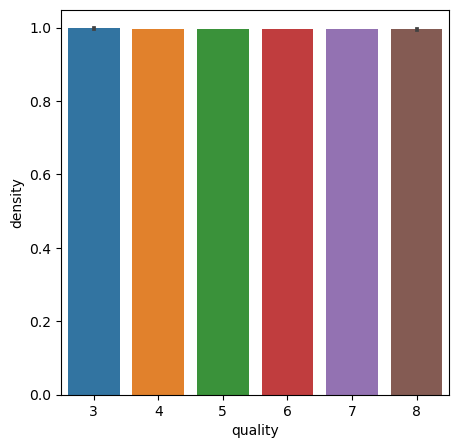

In [24]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=df)

<Axes: xlabel='quality', ylabel='pH'>

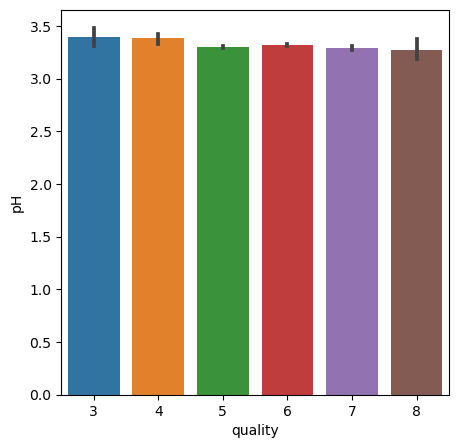

In [25]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=df)

<Axes: xlabel='quality', ylabel='sulphates'>

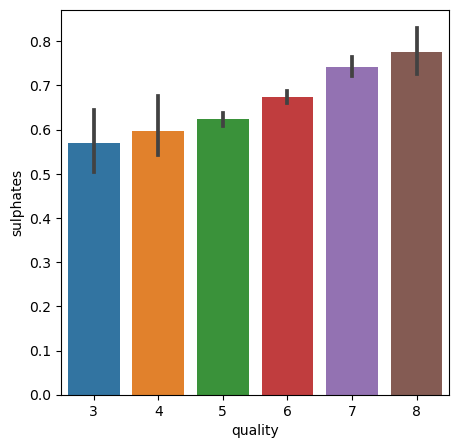

In [26]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

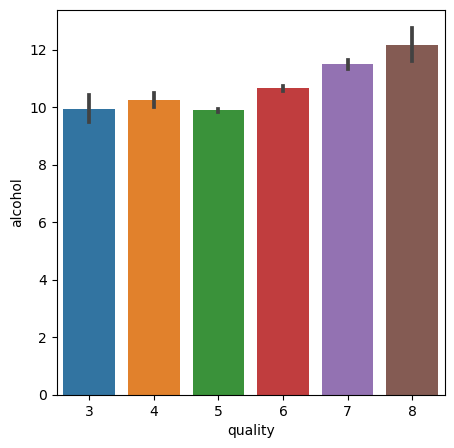

In [27]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=df)

In [28]:
df1=df.corr()

In [29]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [30]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

In [31]:
for col in df:
    
    if df.skew().loc[col]>0.55:
        df[col]=np.log(df[col])
df.skew()

fixed acidity           0.348804
volatile acidity       -0.330795
citric acid             0.312726
residual sugar          1.765238
chlorides               1.887642
free sulfur dioxide    -0.220069
total sulfur dioxide   -0.078161
density                 0.044778
pH                      0.232032
sulphates               0.961460
alcohol                 0.663359
quality                 0.192407
dtype: float64

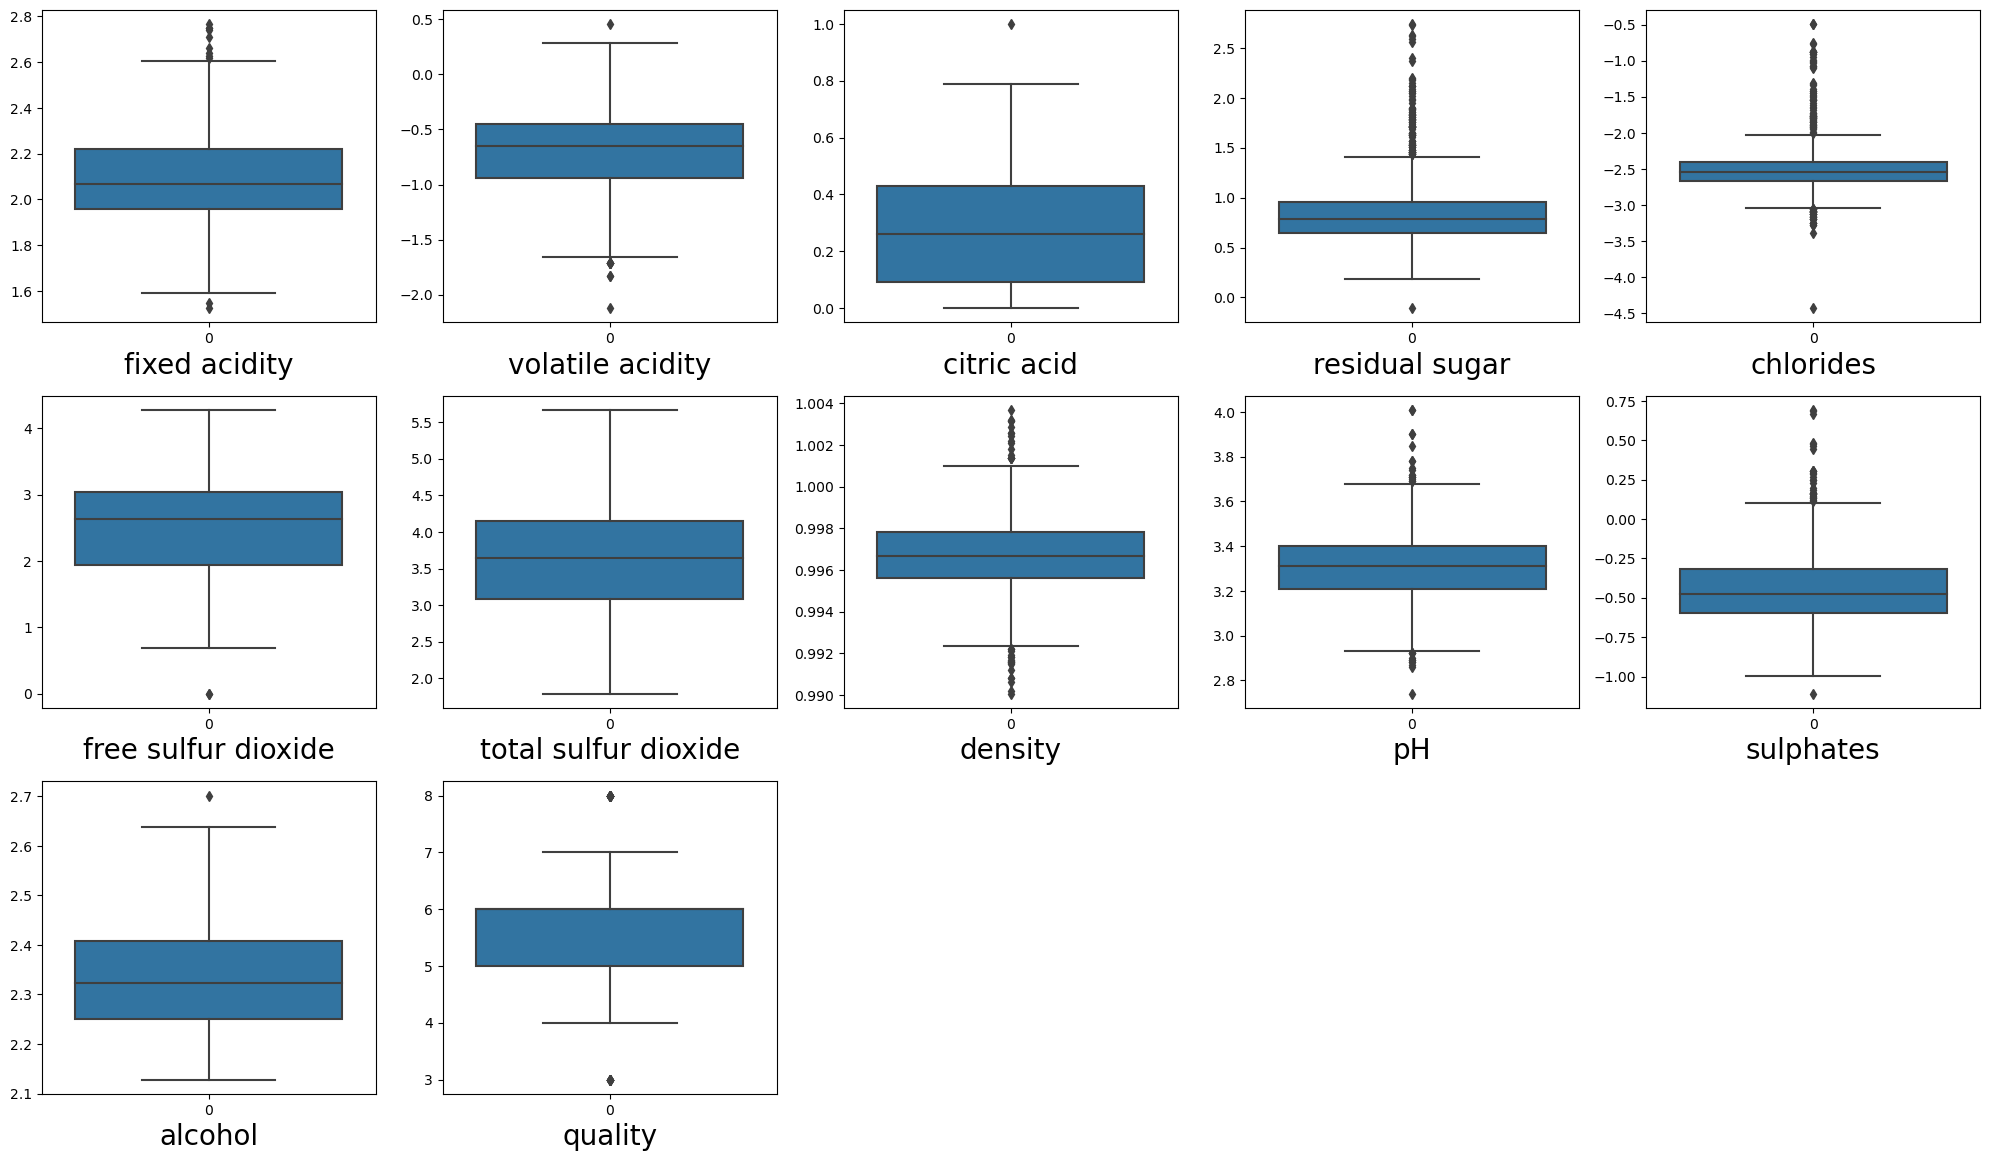

In [32]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1
for column in df:
    if plot_number<=20:
        
        ax=plt.subplot(4,5,plot_number)
        
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
     
        
    plot_number+=1
    
plt.tight_layout()

In [33]:
df.skew()

fixed acidity           0.348804
volatile acidity       -0.330795
citric acid             0.312726
residual sugar          1.765238
chlorides               1.887642
free sulfur dioxide    -0.220069
total sulfur dioxide   -0.078161
density                 0.044778
pH                      0.232032
sulphates               0.961460
alcohol                 0.663359
quality                 0.192407
dtype: float64

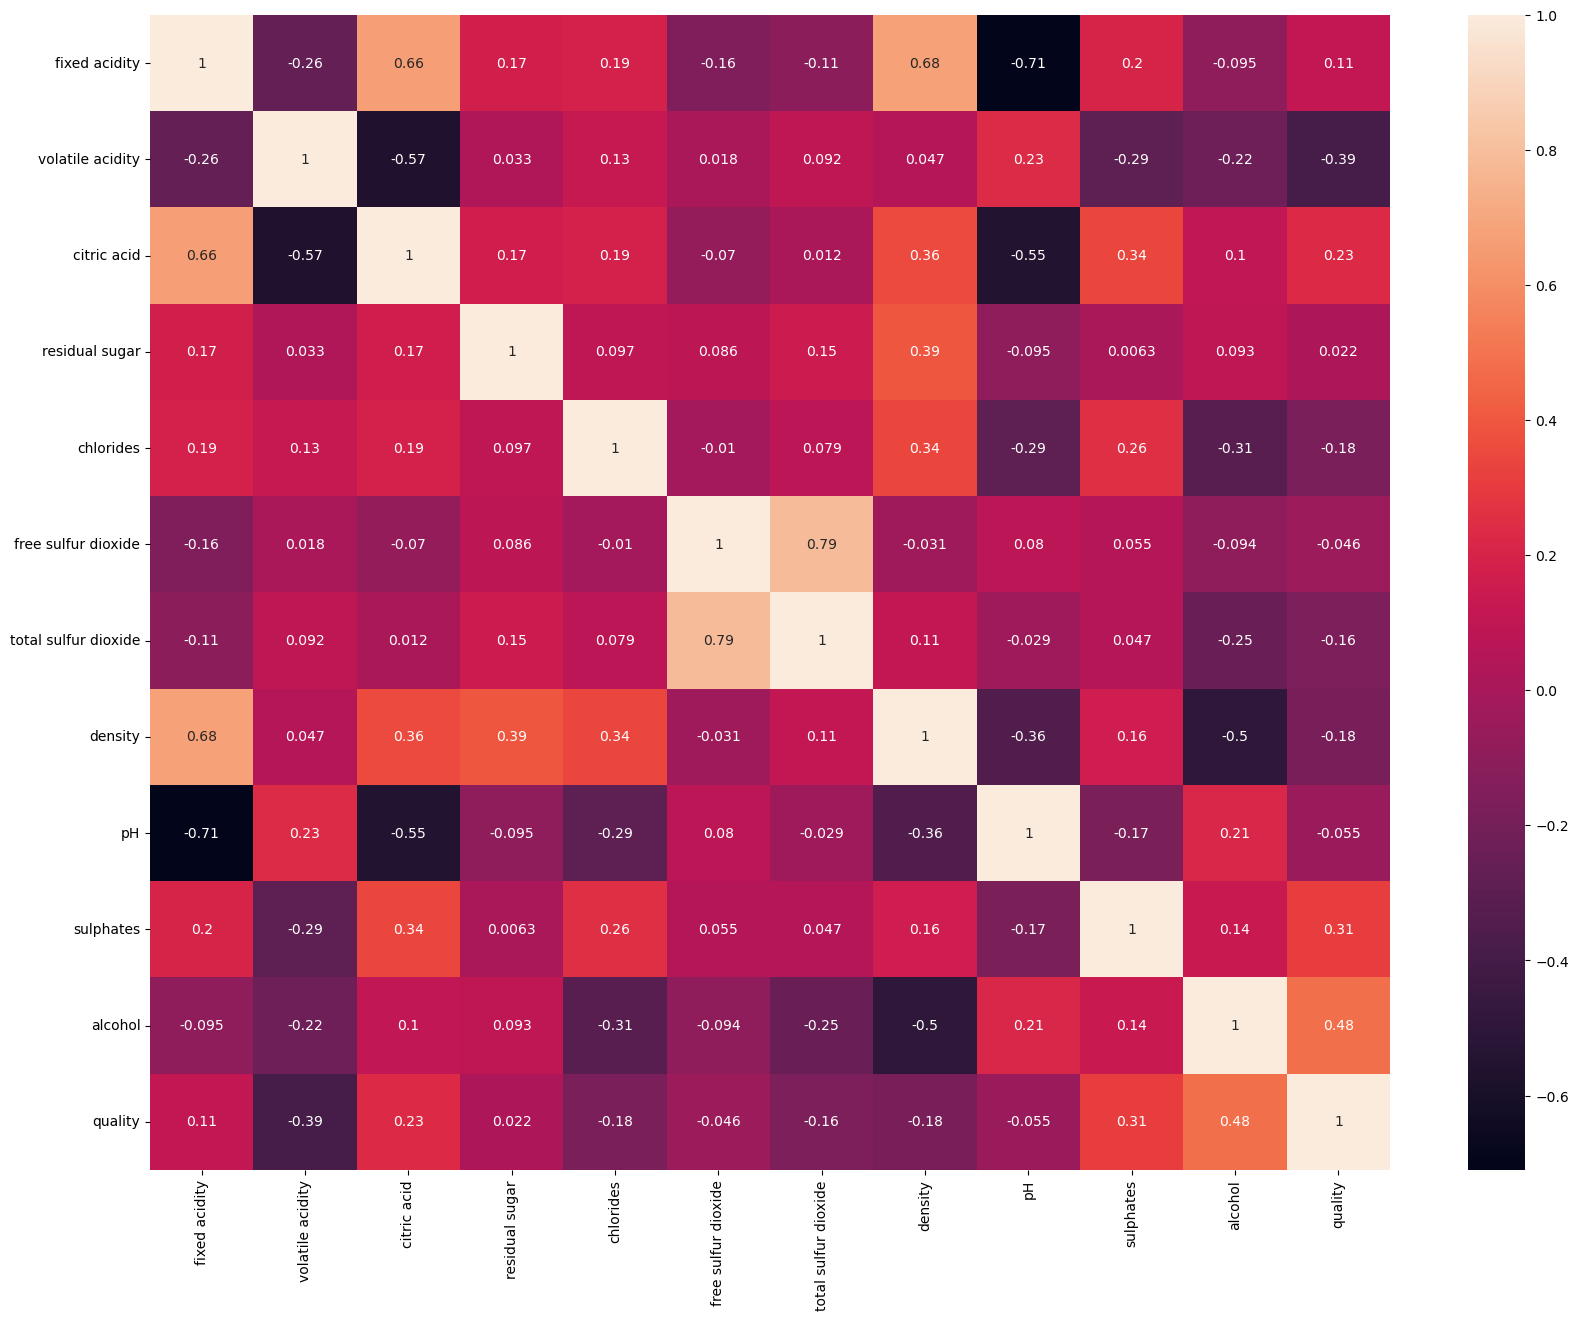

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
df_corr=df.corr()
plt.figure(figsize(10,5))
df_corr['quality'].sort_values(ascending=False).drop("quality").plot.bar()
plt.title("correlation of features vs quality lebel \n",fontsize=16)
plt.xlebel("\n features list",fontsize=14)
plt.ylebel("correlation value",fontsize=12)
plt.show()

NameError: name 'figsize' is not defined

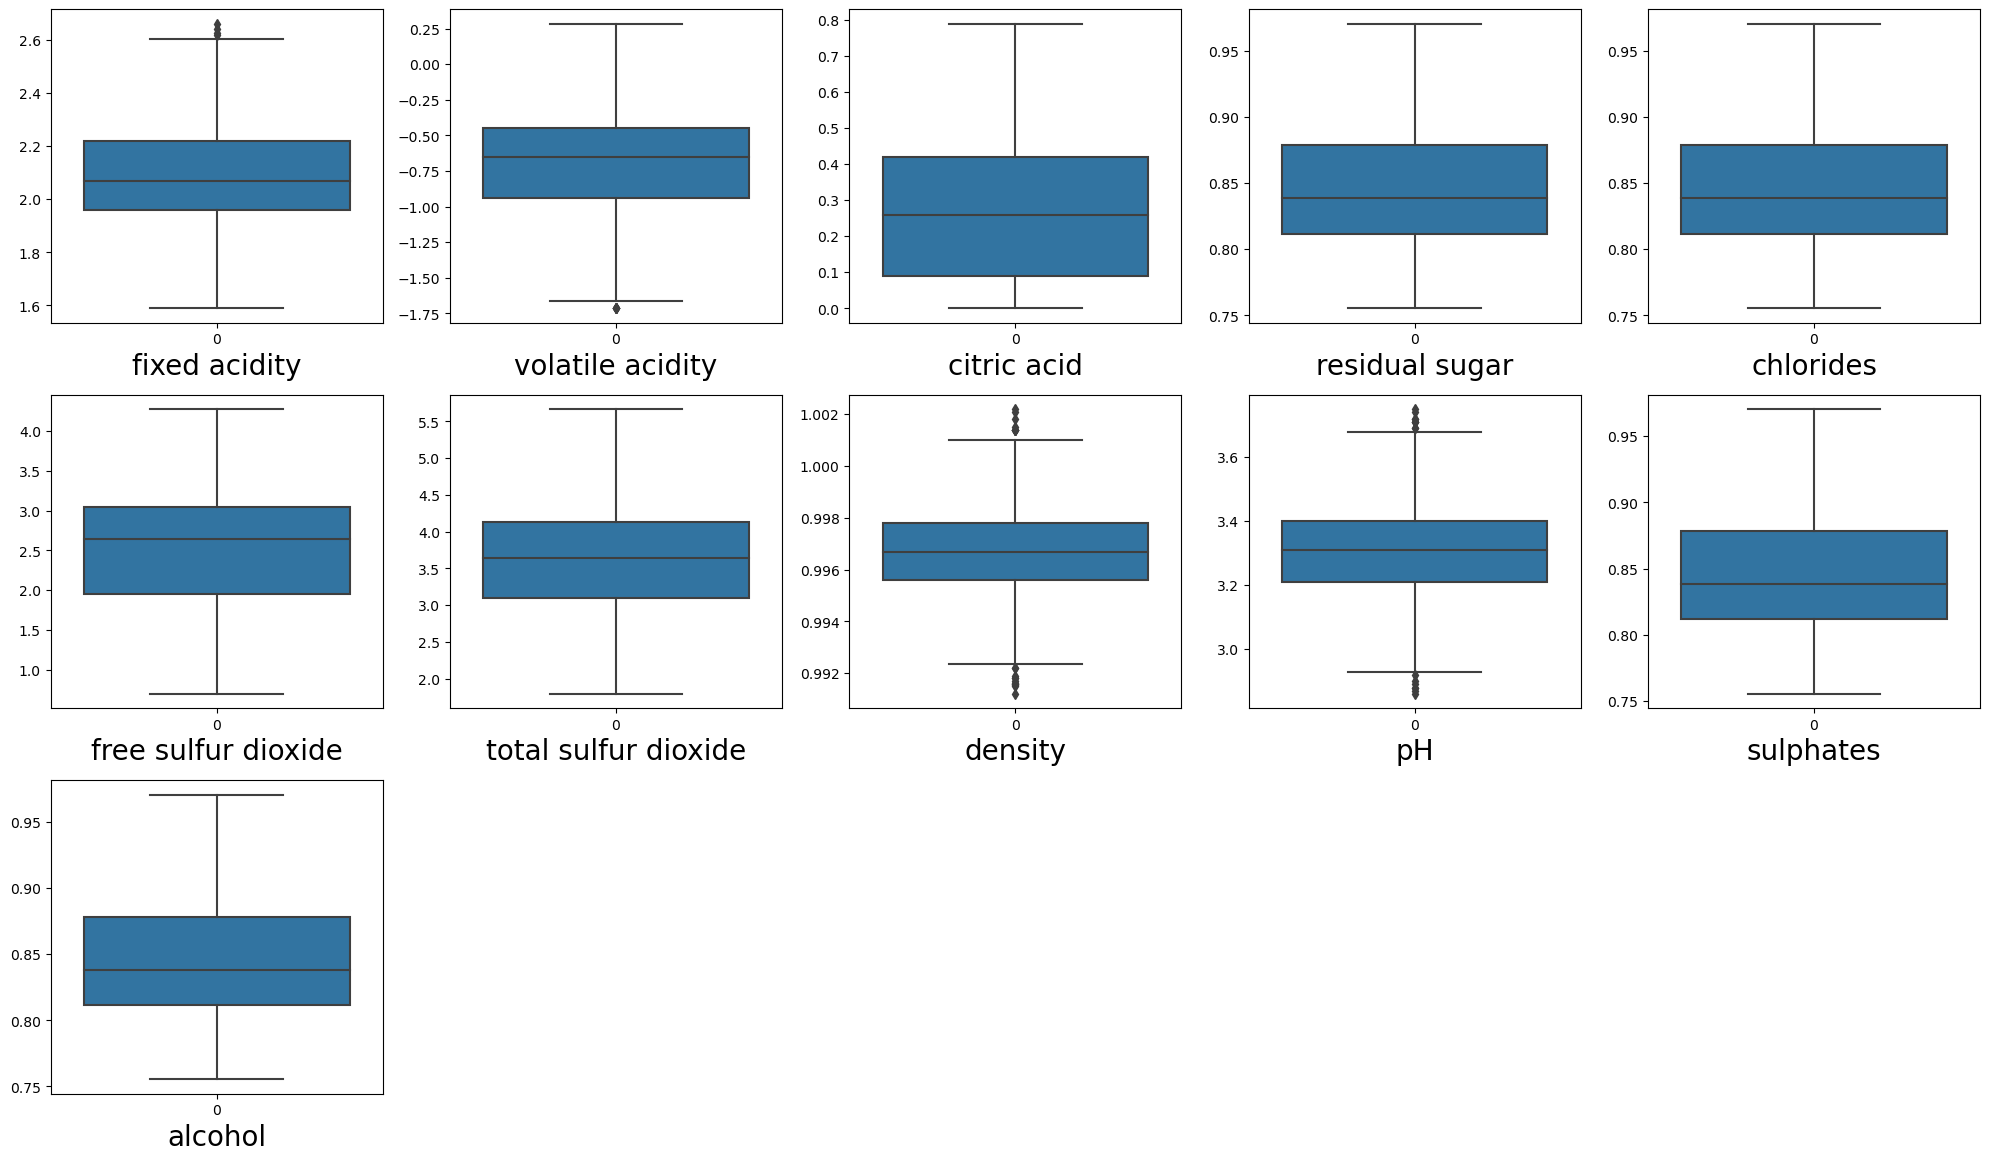

In [67]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1
for column in independent_new:
    if plot_number<=20:
        
        ax=plt.subplot(4,5,plot_number)
        
        sns.boxplot(independent_new[column])
        plt.xlabel(column,fontsize=20)
     
        
    plot_number+=1
    
plt.tight_layout()

In [36]:
X=df.drop("density",axis=1)

In [37]:
X=df.drop("quality",axis=1)

In [38]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,2.240710
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,2.282382
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,2.282382
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,2.282382
5,2.001480,-0.415515,0.00,0.587787,-2.590267,2.564949,3.688879,0.99780,3.51,-0.579818,2.240710
...,...,...,...,...,...,...,...,...,...,...,...
1593,1.916923,-0.478036,0.08,0.641854,-2.688248,3.332205,3.637586,0.99651,3.42,-0.198451,2.251292
1594,1.824549,-0.510826,0.08,0.693147,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,2.351375
1595,1.774952,-0.597837,0.10,0.788457,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,2.415914
1597,1.774952,-0.438505,0.12,0.693147,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,2.322388


In [39]:
Y=df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [42]:
Y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int64

In [51]:
Y.value_counts()

0    1175
1     184
Name: quality, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
sm=SMOTE()

In [55]:
X,Y=sm.fit_resample(X,Y)

In [56]:
Y.value_counts()

0    1175
1    1175
Name: quality, dtype: int64

In [57]:
Scaler=StandardScaler()

In [58]:
x=Scaler.fit_transform(X)

In [59]:
x

array([[-0.54246201,  1.26512323, -1.60491552, ...,  1.39456304,
        -0.94537416, -1.37079117],
       [-0.29301172,  1.90786628, -1.60491552, ..., -0.72259487,
        -0.01318317, -0.97427488],
       [-0.29301172,  1.49610384, -1.39914576, ..., -0.31282237,
        -0.22981752, -0.97427488],
       ...,
       [ 0.91369029, -0.44994204,  0.5885119 , ..., -0.22561189,
         0.0995689 , -0.60706221],
       [ 0.75028891, -0.43471566,  1.12303281, ..., -0.86117582,
         0.14533386,  0.8520802 ],
       [-1.04923907,  0.45663013, -1.13467253, ...,  0.67795134,
         0.22645213,  1.13655093]])

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier



In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [66]:
print(Y.shape,Y_train.shape,Y_test.shape)

(2350,) (1880,) (470,)


In [67]:
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

NameError: name 'norm' is not defined